In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv(r'weatherAUS.csv')

In [16]:
data=data[0:5000]

In [17]:
data['Location']='BadgerysCreek'

In [18]:
columns_to_check = ['Date','Rainfall' , 'Evaporation' , 'Sunshine' , 'WindGustDir' , 'WindGustDir' , 'WindGustSpeed' , 'WindDir9am' , 'WindDir3pm' , 'WindSpeed9am' ,'WindSpeed3pm' , 'Humidity9am' , 'Humidity3pm' , 'Pressure9am' , 'Pressure3pm' , 'Cloud9am' ,'Cloud3pm' ,'Temp9am' ,'Temp3pm' ,'RainTomorrow']  # Replace with your column names
data_cleaned = data.dropna(subset=columns_to_check,how="all", inplace=True)

In [19]:
data_cleaned = data.dropna()
print(data_cleaned)

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]


In [20]:
data_cleaned = data.fillna(0)
data_cleaned.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
data_cleaned.drop(['Date','WindGustDir','WindDir9am','WindDir3pm','RainToday'],inplace=True,axis=1)

<h1 style="font-size: 36px;">EDA OF RAIN PREDICTION :-</h1>


QUES1,What is the distribution of the target variable (RainTomorrow)?


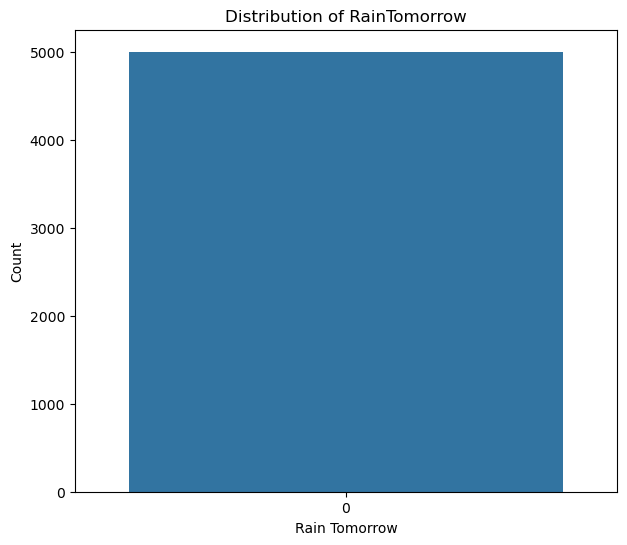

In [22]:
from sklearn.preprocessing import LabelEncoder

# ye 'RainTomorrow' to numerical format me convert kr dega
label_encoder = LabelEncoder()
data['RainTomorrow_encoded'] = label_encoder.fit_transform(data['RainTomorrow'])

#  RainTomorrow ka Count plot
plt.figure(figsize=(7, 6))
sns.countplot(data['RainTomorrow_encoded'])
plt.title('Distribution of RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()


QUES2,What is the distribution of rainfall across different locations?


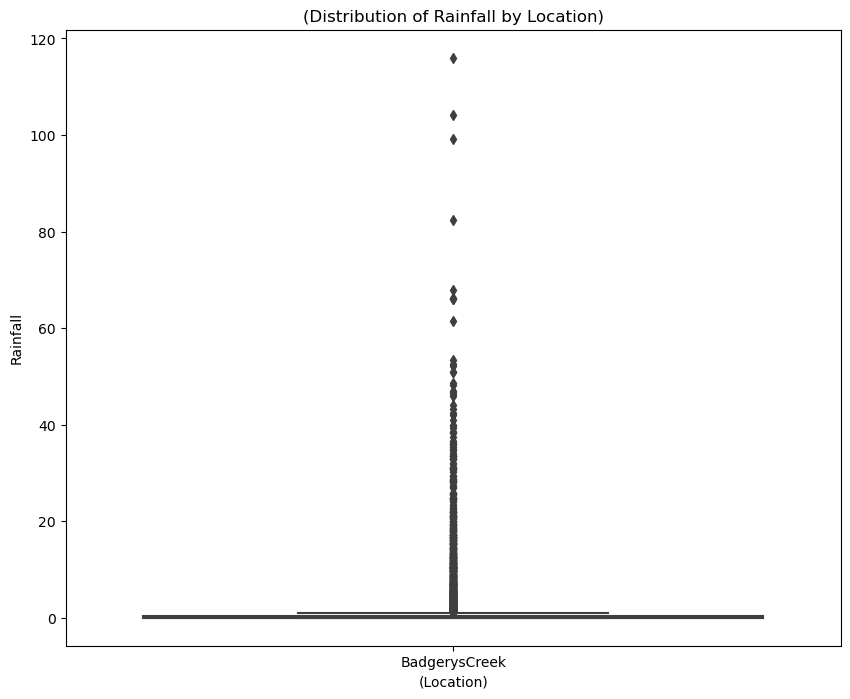

In [29]:
# Rainfall by Location ka boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Location', y='Rainfall', data=data)
plt.title('(Distribution of Rainfall by Location)')
plt.xlabel('(Location)')
plt.ylabel('Rainfall')
plt.xticks(rotation=0)
plt.show()


QUES3How does temperature vary with respect to rainfall?


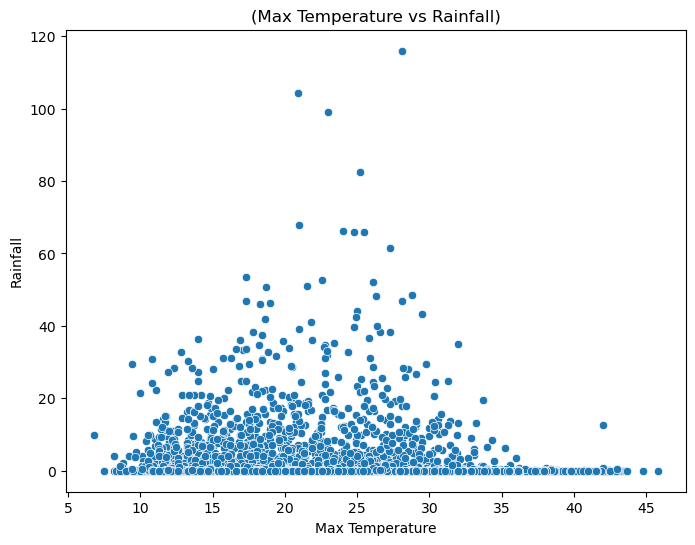

In [24]:
# Scatter plot of MaxTemp vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=data)
plt.title('(Max Temperature vs Rainfall)')
plt.xlabel('Max Temperature')
plt.ylabel('Rainfall')
plt.show()


QUES5,What is the trend of rainfall over time?


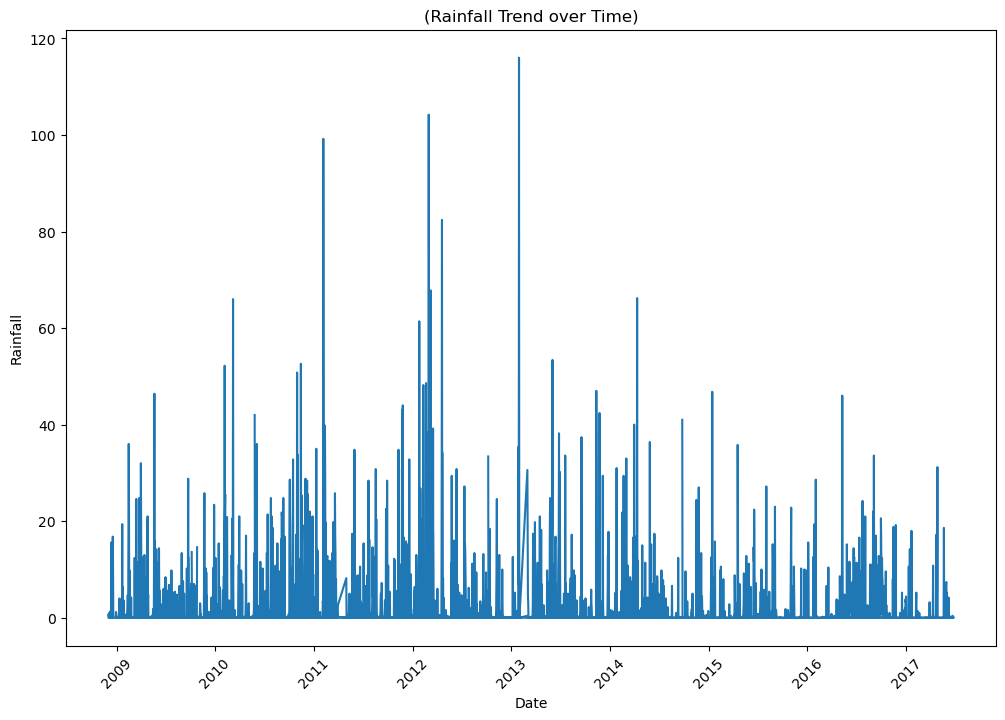

In [25]:

# Line plot of Rainfall over Date
plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'], data['Rainfall'])
plt.title('(Rainfall Trend over Time)')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.xticks(rotation=45)
plt.show()


QUES5,How do the numerical features correlate with the target variable?


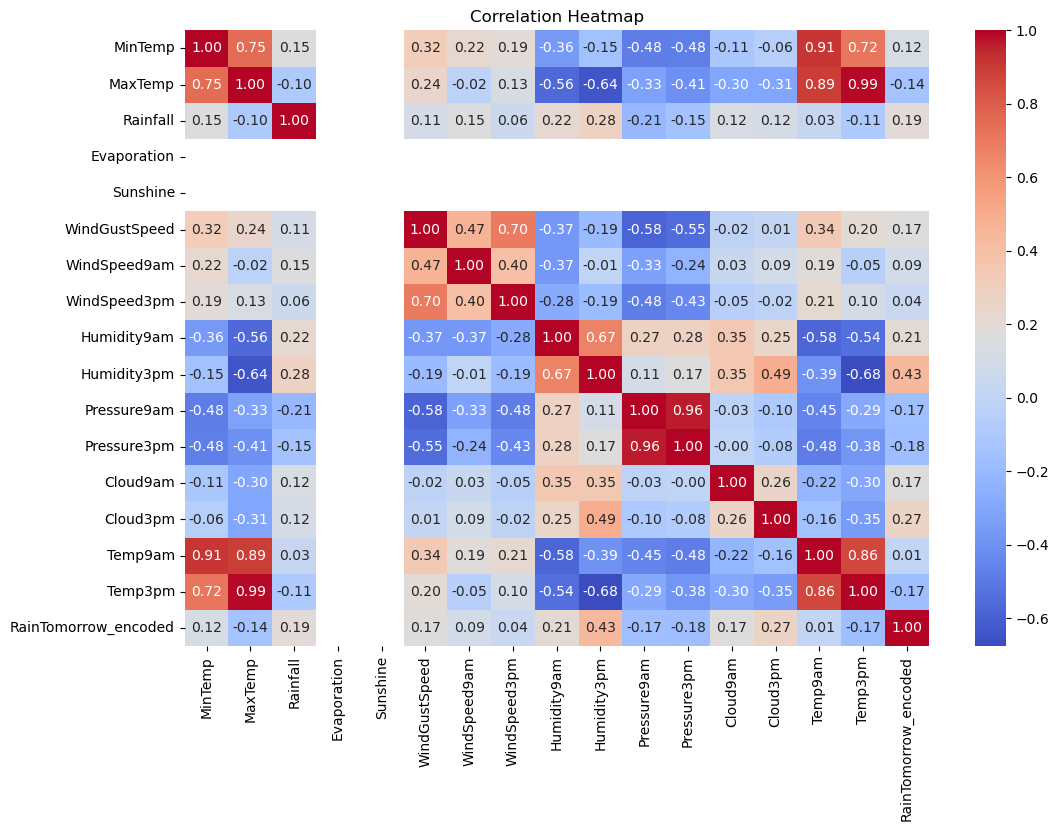

In [26]:
# non-numeric columns ko filter kr dega
numeric_data = data.select_dtypes(include='number')

#  numerical features and RainTomorrow ke bich me Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
